1. Single layer perceptorn - Iris

라이브러리 + 데이터 불러오기

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
iris.head() #미리보기
iris.columns= ['sl','sw','pl','pw','name']
iris['name'].value_counts() #종마다 50개씩 


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: name, dtype: int64

데이터 수 150 -> 100, 종 3종류 -> 2종류

6개의 조합 50:50 test


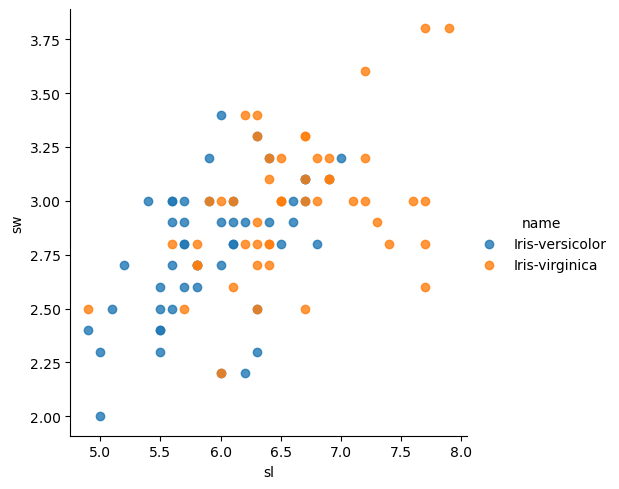

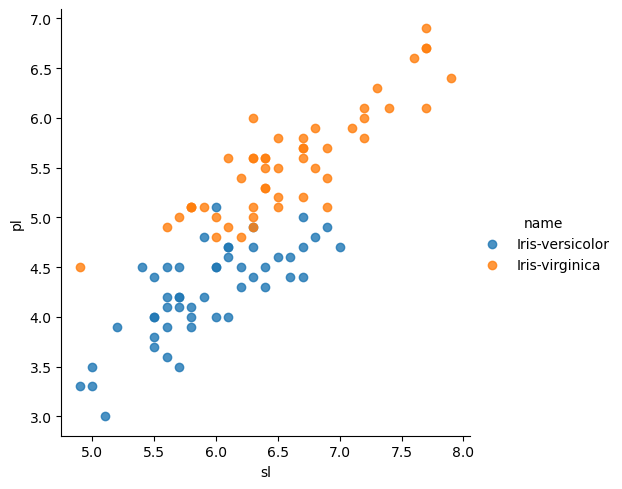

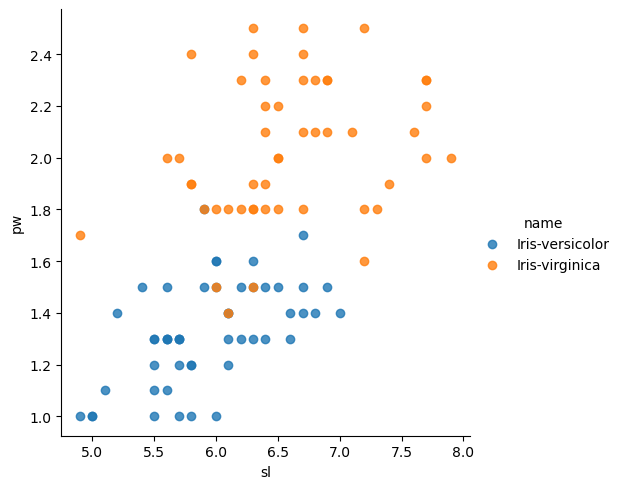

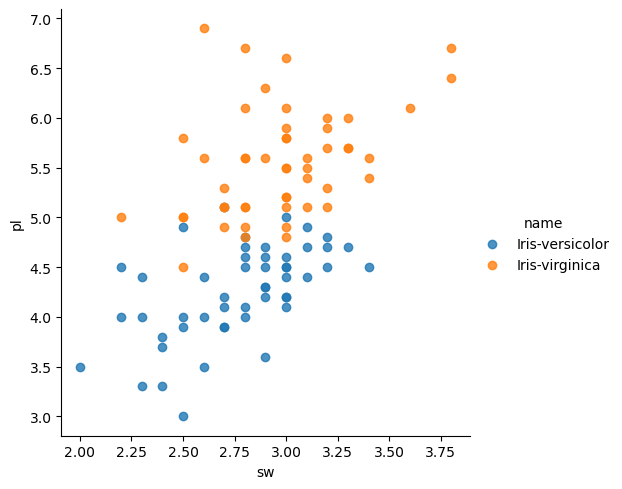

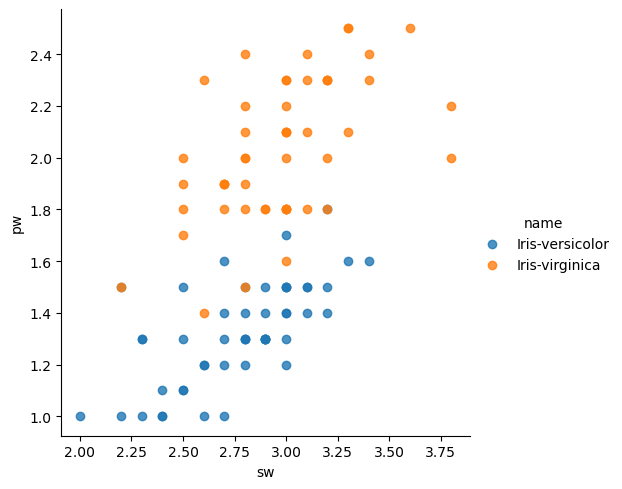

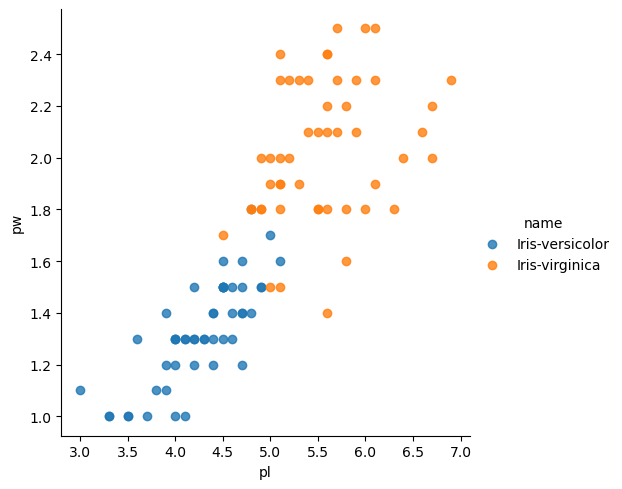

In [20]:
iris_2=iris.copy().truncate(before=50) #vesicolor와 viginica 50개씩 사용
iris_2['name'].value_counts() #분리 제대로 됐나 확인
sns.lmplot(x='sl',y='sw', data=iris_2, hue='name',fit_reg=False)
sns.lmplot(x='sl',y='pl', data=iris_2, hue='name',fit_reg=False)
sns.lmplot(x='sl',y='pw', data=iris_2, hue='name',fit_reg=False)
sns.lmplot(x='sw',y='pl', data=iris_2, hue='name',fit_reg=False)
sns.lmplot(x='sw',y='pw', data=iris_2, hue='name',fit_reg=False)
sns.lmplot(x='pl',y='pw', data=iris_2, hue='name',fit_reg=False)

우선 1개의 조합만 해보기

np.random.choice
np.setdiff1d() 함수는 NumPy 배열에서 두 배열의 차집합을 계산
np.random.choice(len(X), k, replace=False) X에서 k 만큼 랜덤으로 뽑기, 중복 뽑기 X 

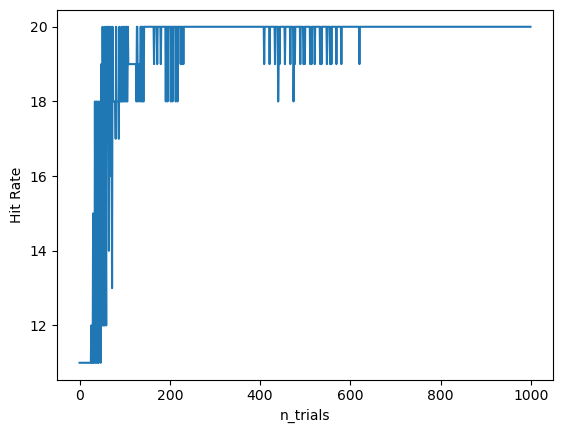

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# step function for single value
def step_func(threshold, x):
    if x < threshold:
        return 0
    return 1

n_trials = 1000
n_test = 20  # Test set 20%
alpha = 0.2  #작을수록 적중률 빠르게 높아지는 대신 과적합 증가 -> 0.2 ~0.1이 적당

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['sl', 'sw', 'pl', 'pw', 'name'] 

X1 = iris.loc[0:99, 'sl'] # 1~100번 째 데이터만 쓰겠다.
X2 = iris.loc[0:99, 'sw']
X = pd.concat([X1, X2], axis=1) # 추가 열로 이어 붙이기

X = X.to_numpy()  # numpy array로 바꾸기

#target array 추출
T = iris.loc[0:99, 'name']
T = T.to_numpy() # numpy array로 바꾸기
T = np.where(T == 'Iris-setosa', 1, 0)  # T가 Iris-setosa가 맞으면 1 아니면 0


W = np.random.randn(3) #가중치
hit_array = []
test_set = np.random.choice(len(X), n_test, replace=False) #test set 랜덤선택
train_set = np.setdiff1d(np.arange(len(X)), test_set) #train set

for i in range(n_trials):
    for j in train_set:       #train set 사용
        s = np.dot(X[j],W[1:])+W[0] #입력 데이터와 가중치 내적곱
        delta=alpha*(T[j]-step_func(0, s))
        W[1:]+=delta*X[j]
        W[0]+=delta   #가중치 변화
    
    hit = 0    
    for k in range(n_test):
        s=np.dot(X[test_set[k]],W[1:])+W[0] #test set 사용
        if step_func(0, s) == T[test_set[k]]: #예측값과 실제값이 같은 경우, hit값 + 1
            hit+=1
    
    hit_array.append(hit)


plt.plot(hit_array)
plt.xlabel('n_trials')
plt.ylabel('Hit Rate')
plt.show()




6개 조합 -> final hit rate 비교
6개 그래프 하나에 표현 했습니다.

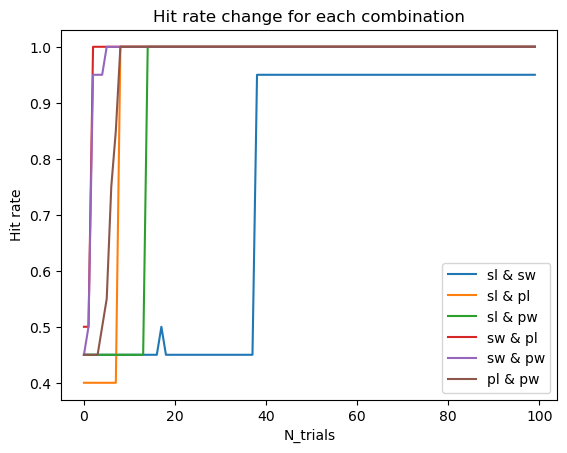

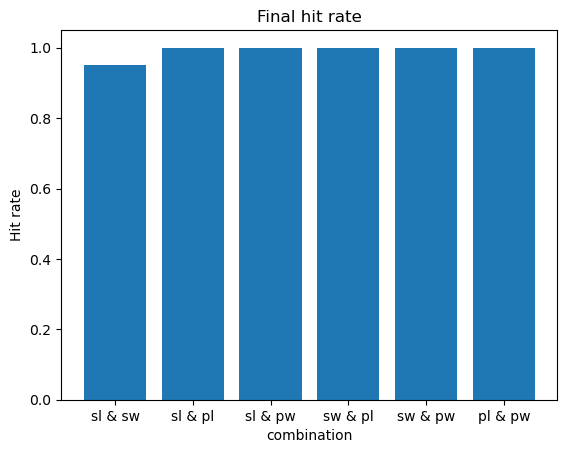

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# step function for single value
def step_func(threshold, x):
    if x < threshold:
        return 0
    return 1

n_trials = 100
n_test = 20  # Test set 20% 
alpha = 0.2

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['sl', 'sw', 'pl', 'pw', 'name'] 

X1 = iris.loc[0:99, 'sl'] 
X2 = iris.loc[0:99, 'sw']
X3 = iris.loc[0:99, 'pl']
X4 = iris.loc[0:99, 'pw']


final_rates = []

for combination in range(1, 7):  #조합 6가지 반복뮨 + hit rate 그래프
    if combination == 1:
        X = pd.concat([X1, X2], axis=1) # sl & sw
    elif combination == 2:
        X = pd.concat([X1, X3], axis=1) # sl & pl
    elif combination == 3:
        X = pd.concat([X1, X4], axis=1) # sl & pw
    elif combination == 4:
        X = pd.concat([X2, X3], axis=1) # sw & pl
    elif combination == 5:
        X = pd.concat([X2, X4], axis=1) # sw & pw
    elif combination == 6:
        X = pd.concat([X3, X4], axis=1) # pl & pw
    
    X = X.to_numpy() 
    
    test_set = np.random.choice(len(X), n_test, replace=False) #test set 설정
    train_set = np.setdiff1d(np.arange(len(X)), test_set) #차집합 -> train set
    
    W = np.random.randn(3)
    
    hit_rate = []
    for i in range(n_trials):
        correct_count = 0
        for j in train_set:
            s = np.dot(X[j], W[1:]) + W[0]
            delta = alpha * (T[j] - step_func(0, s))
            W[1:] += delta * X[j]
            W[0] += delta
        for k in test_set:
            s = np.dot(X[k], W[1:]) + W[0]
            if step_func(0, s) == T[k]:
                correct_count += 1
        hit_rate.append(correct_count / len(test_set))
        
    final_rates.append(hit_rate) #최종 hit rate
    plt.plot(hit_rate, label=x_labels[combination-1])

# 6개 그래프 한번에 나타냈습니다.
plt.legend()
plt.title("Hit rate change for each combination")
plt.xlabel("N_trials")
plt.ylabel("Hit rate")
plt.show()

# 조합 별 hit rate 비교
x_labels = ['sl & sw', 'sl & pl', 'sl & pw', 'sw & pl', 'sw & pw', 'pl & pw']
plt.bar(x_labels, [hit_rate[-1] for hit_rate in final_rates])
plt.title("Final hit rate")
plt.xlabel("combination")
plt.ylabel("Hit rate")
plt.show()




2. Multi-layer perceptron for Iris data

pd.get_dummies() 함수는 카테고리형 데이터(주로 string)를 one-hot encoding 형태(정수형)로 변환해주는 함수

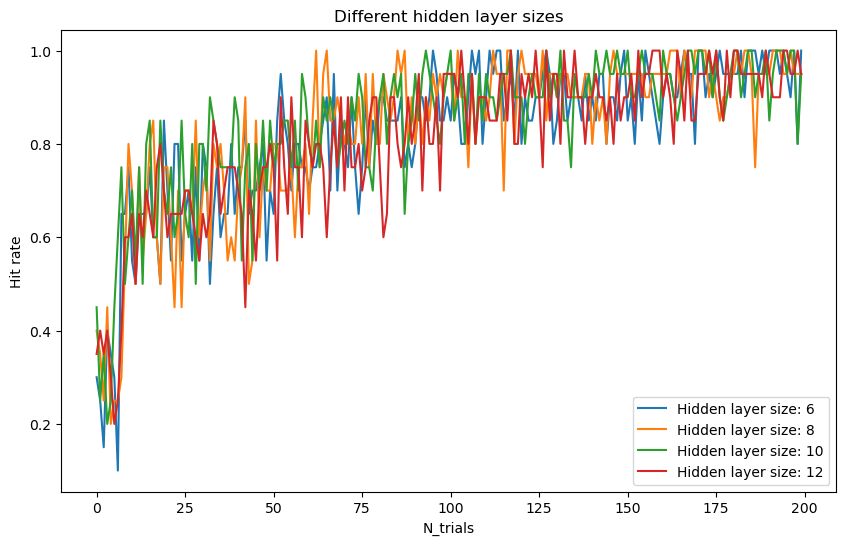

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class mPerceptron:
    
    def __init__(self, i, h, o, a):
        self.i = i  #input
        self.h = h  #hidden node
        self.o = o  #output
        self.a = a  #learning rate
        
        self.Wih = np.random.rand(self.i, self.h)
        self.Who = np.random.rand(self.h, self.o)
        
    def step_func(self, x):
        return 1 / (1 + np.exp(-x))
        
    def train(self, inputs, target):
        I = np.array(inputs, ndmin=2)
        T = np.array(target, ndmin=2)
                
        h_sum = np.dot(I, self.Wih)
        H = self.step_func(h_sum)
        o_sum = np.dot(H, self.Who)
        Y = self.step_func(o_sum)
        
        delta = T - Y
        # hidden layer backpropagated 
        hdelta = np.dot(delta, self.Who.T) #transpose 해야 내적 가능        
        
        self.Who += self.a * np.dot(H.T, delta * Y * (1 - Y)) #
        self.Wih += self.a * np.dot(I.T, hdelta * H * (1 - H))
                
    def test(self, inputs):
        I = np.array(inputs, ndmin=2)
        
        # Forward propagation
        h_sum = np.dot(I, self.Wih)
        H = self.step_func(h_sum)
        o_sum = np.dot(H, self.Who)
        Y = self.step_func(o_sum)
        
        return Y

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

temp = pd.get_dummies(iris[4]) #자료형 변환
temp.replace({1: 0.99, 0: 0.01}, inplace=True) #0.01~0.99사이 값으로 변환

X = iris.iloc[0:150, :4].to_numpy()
X /= [7.9, 4.4, 6.9, 2.5]
T = temp.iloc[0:150, :3].to_numpy()

# Parameters  
n_trials = 200
n_test = 20
a = 0.08
i = 4 
h_values = [6, 8, 10, 12] #hidden nodes 개수 6 8 10 12
o = 3
hit_rates = []
  
for h in h_values:
    hit_array = []
    my = mPerceptron(i, h, o, a)

    for j in range(n_trials): #train
        for k in range (len(X)):
                my.train(X[k], T[k])
            
        hit = 0
        for k in range(n_test):
            s = np.random.randint(0, 149)           
            if np.argmax(T[s]) == np.argmax(my.test(X[s])):
               hit += 1

        hit_rate = hit / n_test
        hit_array.append(hit_rate)
    hit_rates.append(hit_array)

plt.figure(figsize=(10, 6))
for i, h in enumerate(h_values):
    plt.plot(hit_rates[i], label='Hidden layer size: {}'.format(h))
plt.legend()
plt.title('Different hidden layer sizes')
plt.xlabel('N_trials')
plt.ylabel('Hit rate')
plt.show()


3. 와인 퍼셉트론

 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline  

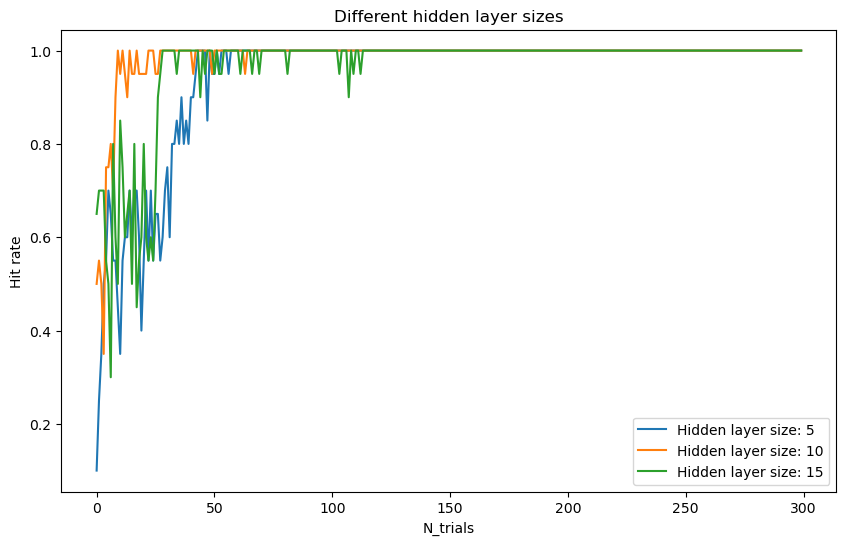

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class mPerceptron:
    def __init__(self, i, h, o, a):
        self.i = i  # input
        self.h = h  # hidden node
        self.o = o  # output
        self.a = a  # learning rate

        self.Wih = np.random.rand(self.i, self.h)
        self.Who = np.random.rand(self.h, self.o)

    def step_func(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, inputs, target):
        I = np.array(inputs, ndmin=2)
        T = np.array(target, ndmin=2)

        h_sum = np.dot(I, self.Wih)
        H = self.step_func(h_sum)
        o_sum = np.dot(H, self.Who)
        Y = self.step_func(o_sum)

        delta = T - Y
        hdelta = np.dot(delta, self.Who.T)

        self.Who += self.a * np.dot(H.T, delta * Y * (1 - Y))
        self.Wih += self.a * np.dot(I.T, hdelta * H * (1 - H))

    def test(self, inputs):
        I = np.array(inputs, ndmin=2)

        h_sum = np.dot(I, self.Wih)
        H = self.step_func(h_sum)
        o_sum = np.dot(H, self.Who)
        Y = self.step_func(o_sum)

        return Y


data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values - 1  # 클래스 레이블은 1부터 시작하므로 1 빼줌

# 표준화:  정확히 공식이 왜 이렇게 되는지 이해하지 못함
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
T = np.zeros((len(y), 3))
T[np.arange(len(y)), y] = 1

#Parameters
n_trials = 300
n_test = 20 #20%
a = 0.01 #0.1보다 커지면 초반부터 겹쳐짐
i = 13
h_values = [5, 10, 15] 
o = 3
hit_rates = []

for h in h_values:
    hit_array = []
    my = mPerceptron(i, h, o, a)

    for j in range(n_trials):
        for k in range(len(X)):
            my.train(X[k], T[k])

        hit = 0
        for k in range(n_test):
            s = np.random.randint(0, len(X))
            if np.argmax(T[s]) == np.argmax(my.test(X[s])):
                hit += 1
    
        hit_rate = hit / n_test
        hit_array.append(hit_rate)

    hit_rates.append(hit_array)

plt.figure(figsize=(10, 6))
for i, h in enumerate(h_values):
    plt.plot(hit_rates[i], label='Hidden layer size: {}'.format(h))
plt.legend()
plt.title('Different hidden layer sizes')
plt.xlabel('N_trials')
plt.ylabel('Hit rate')
plt.show()
